### ライブラリインポート

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import yaml
import os
import sys
import cv2
import glob
os.makedirs('output/picture', exist_ok=True)
os.makedirs('output/picture/density', exist_ok=True)
os.makedirs('output/final_result', exist_ok=True)

### 関数

In [2]:
def vortex_detect(Psi,H):
    a=int(len(Psi)/2)
    filter_den=(((np.abs(Psi)**2*(1-H))/np.max((np.abs(Psi)**2*(1-H))))[a:-1,a:-1])<0.1
    phase=(np.log(Psi).imag*(1-H))[a:-1,a:-1]
    fil_1=np.roll(phase,1,axis=0)
    fil_2=np.roll(fil_1,1,axis=1)
    fil_3=np.roll(fil_2,-1,axis=0)
    fil_4=np.roll(fil_3,-1,axis=0)
    fil_5=np.roll(fil_4,-1,axis=1)
    fil_6=np.roll(fil_5,-1,axis=1)
    fil_7=np.roll(fil_6,1,axis=0)
    fil_8=np.roll(fil_7,1,axis=0)
    filter_po_1=(fil_1>fil_2)*(fil_2>fil_3)*(fil_3>fil_4)*(fil_4>fil_5)*(fil_5>fil_6)*(fil_6>fil_7)*(fil_7>fil_8)
    filter_po_2=(fil_8>fil_1)*(fil_2>fil_3)*(fil_3>fil_4)*(fil_4>fil_5)*(fil_5>fil_6)*(fil_6>fil_7)*(fil_7>fil_8)
    filter_po_3=(fil_8>fil_1)*(fil_1>fil_2)*(fil_3>fil_4)*(fil_4>fil_5)*(fil_5>fil_6)*(fil_6>fil_7)*(fil_7>fil_8)
    filter_po_4=(fil_8>fil_1)*(fil_1>fil_2)*(fil_2>fil_3)*(fil_4>fil_5)*(fil_5>fil_6)*(fil_6>fil_7)*(fil_7>fil_8)
    filter_po_5=(fil_8>fil_1)*(fil_1>fil_2)*(fil_2>fil_3)*(fil_3>fil_4)*(fil_5>fil_6)*(fil_6>fil_7)*(fil_7>fil_8)
    filter_po_6=(fil_8>fil_1)*(fil_1>fil_2)*(fil_2>fil_3)*(fil_3>fil_4)*(fil_4>fil_5)*(fil_6>fil_7)*(fil_7>fil_8)
    filter_po_7=(fil_8>fil_1)*(fil_1>fil_2)*(fil_2>fil_3)*(fil_3>fil_4)*(fil_4>fil_5)*(fil_5>fil_6)*(fil_7>fil_8)
    filter_po_8=(fil_8>fil_1)*(fil_1>fil_2)*(fil_2>fil_3)*(fil_3>fil_4)*(fil_4>fil_5)*(fil_5>fil_6)*(fil_6>fil_7)
    detected_vortex_po=(-1)*-2.0*(filter_po_1+filter_po_2+filter_po_3+filter_po_4+filter_po_5+filter_po_6+filter_po_7+filter_po_8)*filter_den
    filter_ne_1=(fil_1<fil_2)*(fil_2<fil_3)*(fil_3<fil_4)*(fil_4<fil_5)*(fil_5<fil_6)*(fil_6<fil_7)*(fil_7<fil_8)
    filter_ne_2=(fil_8<fil_1)*(fil_2<fil_3)*(fil_3<fil_4)*(fil_4<fil_5)*(fil_5<fil_6)*(fil_6<fil_7)*(fil_7<fil_8)
    filter_ne_3=(fil_8<fil_1)*(fil_1<fil_2)*(fil_3<fil_4)*(fil_4<fil_5)*(fil_5<fil_6)*(fil_6<fil_7)*(fil_7<fil_8)
    filter_ne_4=(fil_8<fil_1)*(fil_1<fil_2)*(fil_2<fil_3)*(fil_4<fil_5)*(fil_5<fil_6)*(fil_6<fil_7)*(fil_7<fil_8)
    filter_ne_5=(fil_8<fil_1)*(fil_1<fil_2)*(fil_2<fil_3)*(fil_3<fil_4)*(fil_5<fil_6)*(fil_6<fil_7)*(fil_7<fil_8)
    filter_ne_6=(fil_8<fil_1)*(fil_1<fil_2)*(fil_2<fil_3)*(fil_3<fil_4)*(fil_4<fil_5)*(fil_6<fil_7)*(fil_7<fil_8)
    filter_ne_7=(fil_8<fil_1)*(fil_1<fil_2)*(fil_2<fil_3)*(fil_3<fil_4)*(fil_4<fil_5)*(fil_5<fil_6)*(fil_7<fil_8)
    filter_ne_8=(fil_8<fil_1)*(fil_1<fil_2)*(fil_2<fil_3)*(fil_3<fil_4)*(fil_4<fil_5)*(fil_5<fil_6)*(fil_6<fil_7)
    detected_vortex_ne=-2.0*(filter_ne_1+filter_ne_2+filter_ne_3+filter_ne_4+filter_ne_5+filter_ne_6+filter_ne_7+filter_ne_8)*filter_den
    detected_vortex=detected_vortex_ne+detected_vortex_po
    pos_po=[]
    pos_ne=[]
    for i in range(len(detected_vortex_po)):
        for j in range(len(detected_vortex_po)):
            if detected_vortex_po[i,j]!=0:
                pos_po.append([i,j])
    pos_po=np.array(pos_po)
    delete_list=[]
    for i in range(len(pos_po)-1):
        for j in range(i+1,len(pos_po)):
            if (pos_po[i][0]-pos_po[j][0])**2+(pos_po[i][1]-pos_po[j][1])**2<2**2:
                if j not in delete_list:
                    delete_list.append(j)
    pos_po=np.delete(pos_po,delete_list,0)
    for i in range(len(detected_vortex_ne)):
        for j in range(len(detected_vortex_ne)):
            if detected_vortex_ne[i,j]!=0:
                pos_ne.append([i,j])
    pos_ne=np.array(pos_ne)
    delete_list=[]
    for i in range(len(pos_ne)-1):
        for j in range(i+1,len(pos_ne)):
            if (pos_ne[i][0]-pos_ne[j][0])**2+(pos_ne[i][1]-pos_ne[j][1])**2<2**2:
                if j not in delete_list:
                    delete_list.append(j)
    pos_ne=np.delete(pos_ne,delete_list,0)
    del delete_list
    delete_list_po=[]
    delete_list_ne=[]
    for i in range(len(pos_po)):
        for j in range(len(pos_ne)):
            if (pos_po[i][0]-pos_ne[j][0])**2+(pos_po[i][1]-pos_ne[j][1])**2<2**2:
                delete_list_po.append(i)
                delete_list_ne.append(j)
                break
    pos_po=np.delete(pos_po,delete_list_po,0)
    pos_ne=np.delete(pos_ne,delete_list_ne,0)
    
    moment_x=0
    moment_y=0
    for i in range(len(pos_po)):
        moment_x=moment_x+(pos_po[i][0]-len(phase)/2)
        moment_y=moment_y+(pos_po[i][1]-len(phase)/2)
    for i in range(len(pos_ne)):
        moment_x=moment_x-(pos_ne[i][0]-len(phase)/2)
        moment_y=moment_y-(pos_ne[i][1]-len(phase)/2)
    moment=(moment_x**2+moment_y**2)**0.5*0.077
    
    return len(pos_po)+len(pos_ne),moment,pos_po,pos_ne

def spectrum(target,filter_list,k_sq,aliasing_filter):
    theta=np.log(target).imag
    v_x=np.fft.ifft2(-1j*k_x*np.fft.fft2(theta)*aliasing_filter).real
    v_y=np.fft.ifft2(-1j*k_y*np.fft.fft2(theta)*aliasing_filter).real
    density_sqrt=np.fft.ifft2(np.fft.fft2(np.abs(target))*aliasing_filter).real
    
    Energy_kin_density=(np.abs(np.fft.fft2(density_sqrt*v_x))**2+np.abs(np.fft.fft2(density_sqrt*v_y))**2)
    Energy_kin_spe=np.zeros(len(filter_list))
    for j in range(len(filter_list)):
        #Energy_kin_spe[j]=(np.sum(k_sq**0.5*Energy_kin_density*filter_list[j])/np.sum(filter_list[j]))
        Energy_kin_spe[j]=(np.sum(Energy_kin_density*filter_list[j])/np.sum(filter_list[j]))
    Energy_kin_spe=Energy_kin_spe/len(target)**2
    
    k_sq_tmp=k_sq.copy()
    k_sq_tmp[0,0]=10**(-5)
    scalar_potential_k=-(-1j*k_x*np.fft.fft2(density_sqrt*v_x)-1j*k_y*np.fft.fft2(density_sqrt*v_y))/(k_sq_tmp)
    #密度含めた定義にしてある
    u_compressible_x_k=-1j*k_x*scalar_potential_k
    u_compressible_y_k=-1j*k_y*scalar_potential_k
    Energy_kin_compressible_density=(np.abs(u_compressible_x_k)**2+np.abs(u_compressible_y_k)**2)
    Energy_kin_compressible_spe=np.zeros(len(filter_list))
    for j in range(len(filter_list)):
        #Energy_kin_compressible_spe[j]=(np.sum(k_sq**0.5*Energy_kin_compressible_density*filter_list[j])/np.sum(filter_list[j]))
        Energy_kin_compressible_spe[j]=(np.sum(Energy_kin_compressible_density*filter_list[j])/np.sum(filter_list[j]))
    Energy_kin_compressible_spe=Energy_kin_compressible_spe/len(target)**2
    u_incompressible_x_k=np.fft.fft2(density_sqrt*v_x)-u_compressible_x_k
    u_incompressible_y_k=np.fft.fft2(density_sqrt*v_y)-u_compressible_y_k
    Energy_kin_incompressible_density=(np.abs(u_incompressible_x_k)**2+np.abs(u_incompressible_y_k)**2)
    Energy_kin_incompressible_spe=np.zeros(len(filter_list))
    for j in range(len(filter_list)):
        #Energy_kin_incompressible_spe[j]=(np.sum(k_sq**0.5*Energy_kin_incompressible_density*filter_list[j])/np.sum(filter_list[j]))
        Energy_kin_incompressible_spe[j]=(np.sum(Energy_kin_incompressible_density*filter_list[j])/np.sum(filter_list[j]))
    Energy_kin_incompressible_spe=Energy_kin_incompressible_spe/len(target)**2
    return Energy_kin_spe,Energy_kin_compressible_spe,Energy_kin_incompressible_spe

### 空間生成

In [3]:
with open('config.yaml') as file:
    object_yaml = yaml.safe_load(file)
    space_div_num=object_yaml['space_div_num']
    a_osc_num=object_yaml['a_osc_num']
    delta_t=object_yaml['delta_t']
    t_N=object_yaml['t_N']
    g_12=object_yaml['g_12']
    vortex_num=object_yaml['vortex_num']
    R_0=object_yaml['R_0']
    V_0=object_yaml['V_0']
    output_wavefunction=object_yaml['output_wavefunction']
    Nonlinearity=object_yaml['Nonlinearity']
    filter_bin=object_yaml['filter_bin']
delta_x=1/a_osc_num

space=np.linspace(-delta_x*(space_div_num-2)/2,delta_x*(space_div_num)/2,space_div_num)
x,y=np.meshgrid(space,space)
space_sq=x**2+y**2
k=2*np.pi*np.fft.fftfreq(space_div_num,d=delta_x)
k_x,k_y=np.meshgrid(k,k)
k_sq=k_x**2+k_y**2
print("Spatial resolution : "+str(delta_x))
print("Wavenumber resolution : "+str(k[1]))
print("Time resolution : "+str(delta_t))

aliasing_filter=np.ones_like(x)
aliasing_filter=aliasing_filter*(np.abs(k_x)<np.max(k_x)/2)*(np.abs(k_y)<np.max(k_y)/2)

H=(x-np.min(x)/2)**2+(y-np.min(y)/2)**2>(R_0*0.9)**2
H=H*((x+np.min(x)/2)**2+(y-np.min(y)/2)**2>(R_0*0.9)**2)
H=H*((x-np.min(x)/2)**2+(y+np.min(y)/2)**2>(R_0*0.9)**2)
H=H*((x+np.min(x)/2)**2+(y+np.min(y)/2)**2>(R_0*0.9)**2)
V=(np.tanh(0.6*(((x-np.min(x)/2)**2+(y-np.min(y)/2)**2)**0.5-1.12*R_0))+1)
V=V*(np.tanh(0.6*(((x+np.min(x)/2)**2+(y-np.min(y)/2)**2)**0.5-1.12*R_0))+1)
V=V*(np.tanh(0.6*(((x-np.min(x)/2)**2+(y+np.min(y)/2)**2)**0.5-1.12*R_0))+1)
V=V*(np.tanh(0.6*(((x+np.min(x)/2)**2+(y+np.min(y)/2)**2)**0.5-1.12*R_0))+1)
V=V*V_0
V_k=np.fft.fft2(V)
V=np.fft.ifft2(V_k*aliasing_filter)

Spatial resolution : 0.16666666666666666
Wavenumber resolution : 0.07363107781851078
Time resolution : 0.002


### 解析

In [4]:
import gc
path_list=glob.glob("output/wavefunction1/*")

dipole_moment_list_1=np.zeros(len(path_list))
vortex_number_list_1=np.zeros(len(path_list))
all_kinetic_energy_list_1=np.zeros(len(path_list))
compressible_kinetic_energy_list_1=np.zeros(len(path_list))
incompressible_kinetic_energy_list_1=np.zeros(len(path_list))

dipole_moment_list_2=np.zeros(len(path_list))
vortex_number_list_2=np.zeros(len(path_list))
all_kinetic_energy_list_2=np.zeros(len(path_list))
compressible_kinetic_energy_list_2=np.zeros(len(path_list))
incompressible_kinetic_energy_list_2=np.zeros(len(path_list))
        
for i in tqdm(range(len(path_list))):
#for i in tqdm(range(5)):
    if i==0:
        psi_1=np.load("output/wavefunction1/initial.npy")
        psi_2=np.load("output/wavefunction2/initial.npy")
    else:
        psi_1=np.load("output/wavefunction1/"+str(output_wavefunction*i)+".npy")
        psi_2=np.load("output/wavefunction2/"+str(output_wavefunction*i)+".npy")
    
    all_vortex_number_1,d_1,vortex_position_positive_1,vortex_position_negative_1=vortex_detect(psi_1,H)
    if all_vortex_number_1==0:
        dipole_moment_list_1[i]=0
    else:
        dipole_moment_list_1[i]=d_1/all_vortex_number_1
    all_vortex_number_2,d_2,vortex_position_positive_2,vortex_position_negative_2=vortex_detect(psi_2,H)
    if all_vortex_number_2==0:
        dipole_moment_list_2[i]=0
    else:
        dipole_moment_list_2[i]=d_2/all_vortex_number_2
    
    vortex_number_list_1[i]=all_vortex_number_1
    vortex_number_list_2[i]=all_vortex_number_2

    fig = plt.figure(figsize=(20,20))
    fig.suptitle("t="+str(i))
    ax1 = fig.add_subplot(2, 2, 1)
    ax2 = fig.add_subplot(2, 2, 2)
    ax3 = fig.add_subplot(2, 2, 3)
    ax4 = fig.add_subplot(2, 2, 4)
    ax1.set_title("density component1")
    ax1.imshow((np.abs(psi_1)**2)[int(np.shape(psi_1)[0]/2):,int(np.shape(psi_1)[0]/2):],origin='lower')
    ax2.set_title("detected vortices component1")
    ax2.imshow(H[int(np.shape(psi_1)[0]/2):,int(np.shape(psi_1)[0]/2):],cmap="binary",origin='lower')
    for j in range(len(vortex_position_positive_1)):
        ax2.plot(vortex_position_positive_1[j][1],vortex_position_positive_1[j][0],marker='o',color="blue")
    for j in range(len(vortex_position_negative_1)):
        ax2.plot(vortex_position_negative_1[j][1],vortex_position_negative_1[j][0],marker='o',color="red")
    ax3.set_title("density component2")
    ax3.imshow((np.abs(psi_2)**2)[int(np.shape(psi_2)[0]/2):,int(np.shape(psi_2)[0]/2):],origin='lower')
    ax4.set_title("detected vortices component2")
    ax4.imshow(H[int(np.shape(psi_2)[0]/2):,int(np.shape(psi_2)[0]/2):],cmap="binary",origin='lower')
    for j in range(len(vortex_position_positive_2)):
        ax4.plot(vortex_position_positive_2[j][1],vortex_position_positive_2[j][0],marker='o',color="blue")
    for j in range(len(vortex_position_negative_2)):
        ax4.plot(vortex_position_negative_2[j][1],vortex_position_negative_2[j][0],marker='o',color="red")
    plt.savefig('output/picture/density/{}.png'.format(format(i, '04')))
    plt.clf()
    plt.close()
    
    del psi_1,psi_2
    del all_vortex_number_1,d_1,vortex_position_positive_1,vortex_position_negative_1,all_vortex_number_2,d_2,vortex_position_positive_2,vortex_position_negative_2
    gc.collect()

100%|██████████| 6/6 [00:04<00:00,  1.29it/s]


In [5]:
time=np.linspace(0,(len(path_list)-1)*(output_wavefunction*delta_t),len(path_list))

#双極子モーメント
fig = plt.figure(figsize=(30,15))
fig.suptitle("dipole moment")
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.set_title("dipole moment component1")
ax1.set_xlim(0,len(path_list)-1)
ax1.set_xlabel('t (ħ/(gn))')
ax1.set_ylabel('d')
ax1.plot(time,dipole_moment_list_1)
ax2.set_title("dipole moment component2")
ax2.set_xlim(0,len(path_list)-1)
ax2.set_xlabel('t (ħ/(gn))')
ax2.set_ylabel('d')
ax2.plot(time,dipole_moment_list_2)
plt.savefig('output/final_result/dipole_moment.png')
plt.close()

#渦の数
fig = plt.figure(figsize=(30,15))
fig.suptitle("vortex number")
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.set_title("vortex number component1")
ax1.set_xlim(0,len(path_list)-1)
ax1.set_xlabel('t (ħ/(gn))')
ax1.set_ylabel('N_vortex')
ax1.plot(time,vortex_number_list_1)
ax2.set_title("vortex number component2")
ax2.set_xlim(0,len(path_list)-1)
ax2.set_xlabel('t (ħ/(gn))')
ax2.set_ylabel('N_vortex')
ax2.plot(time,vortex_number_list_1)
plt.savefig('output/final_result/vortex_number.png')
plt.close()

#動画
img=cv2.imread('output/picture/density/0000.png')
width=np.shape(img)[0]
height=np.shape(img)[1]

fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
video = cv2.VideoWriter('output/final_result/density.mp4',fourcc, 20.0, (height, width))
for i in range(len(path_list)):
    img=cv2.imread('output/picture/density/%04d.png' % i)
    video.write(img)
video.release()

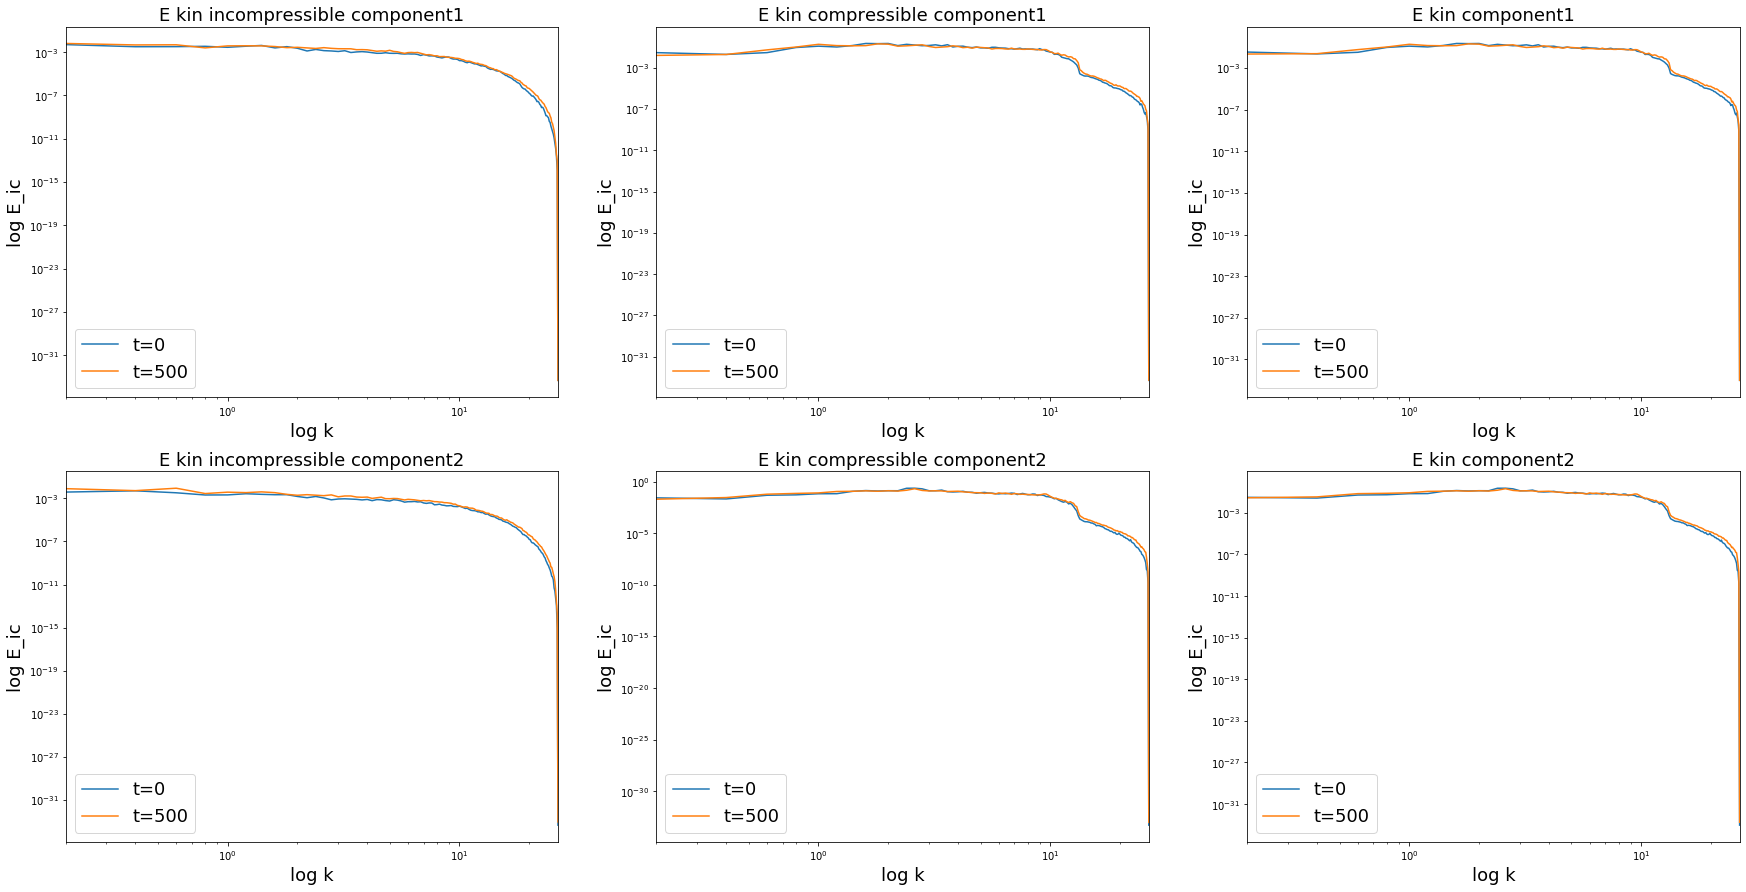

In [6]:
path_list=glob.glob("output/wavefunction1/*")

Z=np.arange(0,np.max(k_sq)**0.5,filter_bin)
Z[0]=10**(-5)

filter_list=[]
for j in range(len(Z)):
    if j==0:
        filter_tmp=np.sqrt(k_sq)<=filter_bin/2
        filter_tmp*=np.sqrt(k_sq)>0
        filter_list.append(1*filter_tmp)
    else:
        filter_tmp=np.sqrt(k_sq)<=j/int(1/filter_bin)+filter_bin/2
        filter_tmp*=np.sqrt(k_sq)>j/int(1/filter_bin)-filter_bin/2
        filter_list.append(1*filter_tmp)

fig = plt.figure(figsize=(30,15))
ax1 = fig.add_subplot(2, 3, 1)
ax2 = fig.add_subplot(2, 3, 2)
ax3 = fig.add_subplot(2, 3, 3)
ax4 = fig.add_subplot(2, 3, 4)
ax5 = fig.add_subplot(2, 3, 5)
ax6 = fig.add_subplot(2, 3, 6)

psi_1=np.load("output/wavefunction1/initial.npy")
E_kin_spe_1,E_kin_compressible_spe_1,E_kin_incompressible_spe_1=spectrum(psi_1,filter_list,k_sq,aliasing_filter)
psi_2=np.load("output/wavefunction1/500.npy")
E_kin_spe_2,E_kin_compressible_spe_2,E_kin_incompressible_spe_2=spectrum(psi_2,filter_list,k_sq,aliasing_filter)

ax1.set_title("E kin incompressible component1",fontsize=18)
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.set_xlim(Z[1],Z[-1])
ax1.set_xlabel('log k',fontsize=18)
ax1.set_ylabel('log E_ic',fontsize=18)
ax1.plot(Z,E_kin_incompressible_spe_1,label="t=0")
ax1.plot(Z,E_kin_incompressible_spe_2,label="t=500")
#ax1.plot(Z,Z**(-5/3)*10**(-1.3),label="k^(-5/3)")
#ax1.plot(Z,Z**(-1)*10**(-1.9),label="k^(-1)")
ax1.legend(fontsize=18)

ax2.set_title("E kin compressible component1",fontsize=18)
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xlim(Z[1],Z[-1])
ax2.set_xlabel('log k',fontsize=18)
ax2.set_ylabel('log E_ic',fontsize=18)
ax2.plot(Z,E_kin_compressible_spe_1,label="t=0")
ax2.plot(Z,E_kin_compressible_spe_2,label="t=500")
#ax2.plot(Z,Z**(-5/3)*10**(-1.3),label="k^(-5/3)")
#ax2.plot(Z,Z**(-1)*10**(-1.9),label="k^(-1)")
ax2.legend(fontsize=18)

ax3.set_title("E kin component1",fontsize=18)
ax3.set_xscale("log")
ax3.set_yscale("log")
ax3.set_xlim(Z[1],Z[-1])
ax3.set_xlabel('log k',fontsize=18)
ax3.set_ylabel('log E_ic',fontsize=18)
ax3.plot(Z,E_kin_spe_1,label="t=0")
ax3.plot(Z,E_kin_spe_2,label="t=500")
#ax3.plot(Z,Z**(-5/3)*10**(-1.3),label="k^(-5/3)")
#ax3.plot(Z,Z**(-1)*10**(-1.9),label="k^(-1)")
ax3.legend(fontsize=18)

psi_1=np.load("output/wavefunction2/initial.npy")
E_kin_spe_1,E_kin_compressible_spe_1,E_kin_incompressible_spe_1=spectrum(psi_1,filter_list,k_sq,aliasing_filter)
psi_2=np.load("output/wavefunction2/500.npy")
E_kin_spe_2,E_kin_compressible_spe_2,E_kin_incompressible_spe_2=spectrum(psi_2,filter_list,k_sq,aliasing_filter)

ax4.set_title("E kin incompressible component2",fontsize=18)
ax4.set_xscale("log")
ax4.set_yscale("log")
ax4.set_xlim(Z[1],Z[-1])
ax4.set_xlabel('log k',fontsize=18)
ax4.set_ylabel('log E_ic',fontsize=18)
ax4.plot(Z,E_kin_incompressible_spe_1,label="t=0")
ax4.plot(Z,E_kin_incompressible_spe_2,label="t=500")
#ax4.plot(Z,Z**(-5/3)*10**(-1.3),label="k^(-5/3)")
#ax4.plot(Z,Z**(-1)*10**(-1.9),label="k^(-1)")
ax4.legend(fontsize=18)

ax5.set_title("E kin compressible component2",fontsize=18)
ax5.set_xscale("log")
ax5.set_yscale("log")
ax5.set_xlim(Z[1],Z[-1])
ax5.set_xlabel('log k',fontsize=18)
ax5.set_ylabel('log E_ic',fontsize=18)
ax5.plot(Z,E_kin_compressible_spe_1,label="t=0")
ax5.plot(Z,E_kin_compressible_spe_2,label="t=500")
#ax5.plot(Z,Z**(-5/3)*10**(-1.3),label="k^(-5/3)")
#ax5.plot(Z,Z**(-1)*10**(-1.9),label="k^(-1)")
ax5.legend(fontsize=18)

ax6.set_title("E kin component2",fontsize=18)
ax6.set_xscale("log")
ax6.set_yscale("log")
ax6.set_xlim(Z[1],Z[-1])
ax6.set_xlabel('log k',fontsize=18)
ax6.set_ylabel('log E_ic',fontsize=18)
ax6.plot(Z,E_kin_spe_1,label="t=0")
ax6.plot(Z,E_kin_spe_2,label="t=500")
#ax6.plot(Z,Z**(-5/3)*10**(-1.3),label="k^(-5/3)")
#ax6.plot(Z,Z**(-1)*10**(-1.9),label="k^(-1)")
ax6.legend(fontsize=18)

#plt.savefig('output/final_result/kinetic_energy_spectrum')
plt.show()
plt.close()

In [7]:
time=np.linspace(0,(len(path_list)-1)*(output_wavefunction*delta_t),len(path_list))
path_list=glob.glob("output/wavefunction1/*")
Energy=[]
E_kin_list=[]
E_pot_list=[]
E_int_inter_list=[]
E_int_intra_list=[]
for i in range(len(path_list)):
    if i==0:
        psi_1=np.load("output/wavefunction1/initial.npy")
        psi_2=np.load("output/wavefunction2/initial.npy")
    else:
        psi_1=np.load("output/wavefunction1/"+str(output_wavefunction*i)+".npy")
        psi_2=np.load("output/wavefunction2/"+str(output_wavefunction*i)+".npy")
    
    psi_k_1=np.fft.fft2(psi_1)*aliasing_filter
    psi_k_2=np.fft.fft2(psi_2)*aliasing_filter
    psi_1=np.fft.ifft2(psi_k_1)
    psi_2=np.fft.ifft2(psi_k_2)
    psi_1_x=np.fft.ifft2(-1j*k_x*psi_k_1)
    psi_1_y=np.fft.ifft2(-1j*k_y*psi_k_1)
    psi_2_x=np.fft.ifft2(-1j*k_x*psi_k_2)
    psi_2_y=np.fft.ifft2(-1j*k_y*psi_k_2)
    E_kin=np.sum(np.abs(psi_1_x)**2+np.abs(psi_1_y)**2+np.abs(psi_2_x)**2+np.abs(psi_2_y)**2)/2
    E_pot=np.sum(V.real*(np.abs(psi_1)**2+np.abs(psi_2)**2))
    E_int_intra=Nonlinearity*np.sum(np.abs(psi_1)**4+np.abs(psi_2)**4)/2
    E_int_inter=g_12*Nonlinearity*np.sum(np.abs(psi_1)**2*np.abs(psi_2)**2)
    E_kin_list.append(E_kin)
    E_pot_list.append(E_pot)
    E_int_intra_list.append(E_int_intra)
    E_int_inter_list.append(E_int_inter)
    Energy.append(E_kin+E_pot+E_int_intra+E_int_inter)
    del psi_1,psi_2,psi_k_1,psi_k_2,psi_1_x,psi_1_y,psi_2_x,psi_2_y,E_kin,E_pot,E_int_inter,E_int_intra

plt.plot(time,E_kin_list)
plt.savefig('output/final_result/kinetic_energy')
plt.close()
plt.plot(time,E_pot_list)
plt.savefig('output/final_result/potential_energy')
plt.close()
plt.plot(time,E_int_intra_list)
plt.savefig('output/final_result/intra_energy')
plt.close()
plt.plot(time,E_int_inter_list)
plt.savefig('output/final_result/inter_energy')
plt.close()
plt.plot(time,Energy)
plt.savefig('output/final_result/all_energy')
plt.close()